In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [21]:
modeloPath = './resultadosPokedex/modelo.h5'
pesosPath = './resultadosPokedex/pesos.h5'

In [22]:
model = tf.keras.models.load_model(modeloPath)

In [23]:
model.load_weights(pesosPath)

In [24]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
____________________________________________________________________________________________

In [60]:
%matplotlib inline

In [92]:
def predict(file):
    x = tf.keras.preprocessing.image.load_img(file)
    plt.imshow(x)
    x = tf.keras.preprocessing.image.load_img(file, target_size=(128,128,3))
    x = tf.keras.preprocessing.image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    arreglo = model.predict(x) #[[0,1,0,0]]
    resultado = arreglo[0] # [0,1,0,0]
    respuesta = np.argmax(resultado)
    if respuesta == 0:
        print("Bulbasaur, ",respuesta)
    elif respuesta == 1:
        print("Charmander ",respuesta)
    elif respuesta == 2:
        print("pikachu ",respuesta)
    elif respuesta == 3:
        print("Squirtle ",respuesta)

In [93]:
misRutas = ['./pokemons/validation/Pikachus/00000186.png',
            './pokemons/validation/Bulbasaurs/00000185.png',
            './pokemons/validation/Charmanders/c1b9a62779f3454991d2c90d883f07e7.jpg',
            './pokemons/validation/Pikachus/aad0acbe511d43868c82a68bd9a4aa8b.jpg']

Squirtle  3


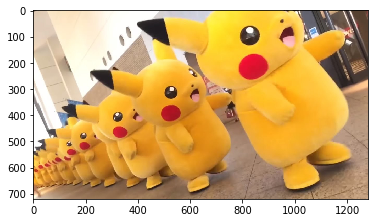

In [94]:
predict(misRutas[3])

Charmander  1


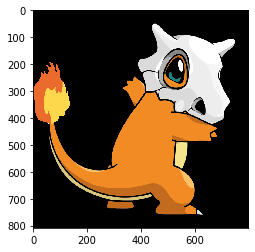

In [95]:
predict('./pokemons/train/Charmanders/00000029.png')